**XGBoost Regression**

Classification is about predicting a class or discrete values. Eg: True or False.


Regression is about predicting a quantity or continuos values. Eg: Salary, Age.


The Dataset being used is the **Boston House Price Dataset**


The goal here is to predict the price of the house using the 13 differnet features in the dataset.


We are using a **XGBoost Regressor**.

# **Workflow**
1. House Price Data
2. Data Preprocessing
3. Data Analysis
4. Train Test Split
5. XGBoost Regressor
6. Evaluation
7. We then have a trained XGBoost Regressor  which can predict the Price of the house using new data.

# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Used for plotting
import sklearn.datasets # Used to load the dataset
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import metrics


# **EDA**

In [5]:
# Load California Housing Dataset
#house_price_dataset = sklearn.datasets.fetch_california_housing() # Dataset not avaiable so were downloading it
# Load Boston Housing
house_price_dataset =  pd.read_csv('BostonHousing.csv')

In [6]:
print(house_price_dataset)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [7]:
house_price_dataset.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [12]:
# Loading the Dataset into Pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [15]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
# Change the name of the last comlumn to Target
house_price_dataframe.rename(columns={'medv':'price'}, inplace=True)

In [24]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
house_price_dataframe.shape

(506, 14)

In [29]:
# Check if the Dataset has missing values
house_price_dataframe.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [30]:
# Statistical Measures of Data
house_price_dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Correlation**

Understanding the Correlation between various Features in the Dataset

1. Positive Correlation : If one feature increases the other feature also increases.

2. Negative Correlation : If one feature increases the other feature decreases or vice-versa.

In [31]:
correlation = house_price_dataframe.corr()

<Axes: >

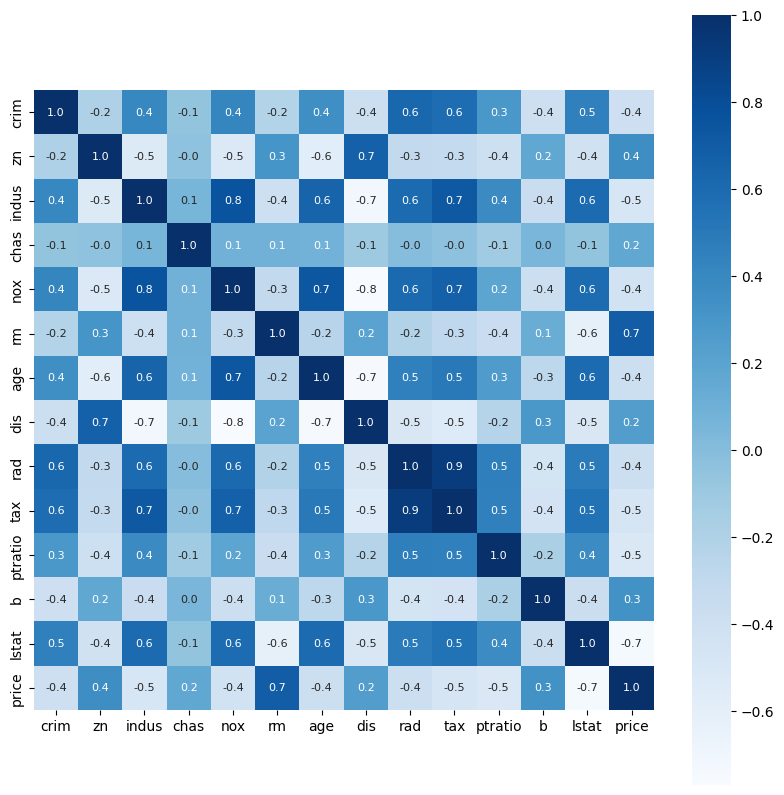

In [34]:
# Heatmap to understand all the Correaltions
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
# Cbar is the color bar on the right
# Square puts all the values in square boxes
# fmt decides how many decimal points

# **Test and Train**

In [36]:
# Seperating Data and Label
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [37]:
# Test and Train Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print (X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# **Model Training**

XGBoost Regressor is a type of a Decision Tree Alogorithm. It is an Ensemble Model.

In [55]:
# Loading the Model
model = XGBRegressor()

In [56]:
# Fitting the Training Data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
# Unlike Classification Porblems we can't find the accuracy score so we find the RMS (Root Mean Squared Error)
training_data_prediction = model.predict(X_train)
training_data_prediction

array([23.112196 , 20.992601 , 20.10438  , 34.67932  , 13.920501 ,
       13.499354 , 21.998383 , 15.206723 , 10.89543  , 22.67402  ,
       13.795236 ,  5.602332 , 29.808502 , 49.98666  , 34.89634  ,
       20.594336 , 23.388903 , 19.2118   , 32.69294  , 19.604128 ,
       26.978151 ,  8.405952 , 46.00062  , 21.70406  , 27.084402 ,
       19.372278 , 19.297894 , 24.79984  , 22.608278 , 31.707775 ,
       18.53683  ,  8.703393 , 17.40025  , 23.698814 , 13.29729  ,
       10.504759 , 12.693588 , 24.994888 , 19.694864 , 14.911037 ,
       24.20254  , 24.991112 , 14.901547 , 16.987965 , 15.592753 ,
       12.704759 , 24.505623 , 15.007718 , 49.999355 , 17.509344 ,
       21.18844  , 31.999287 , 15.606071 , 22.902134 , 19.309835 ,
       18.697083 , 23.302961 , 37.19767  , 30.102247 , 33.117855 ,
       20.993683 , 50.00471  , 13.40048  ,  5.002565 , 16.50862  ,
        8.4016905, 28.651423 , 19.49218  , 20.595366 , 45.404697 ,
       39.808857 , 33.4055   , 19.81498  , 33.406376 , 25.3020

# **Model Evaluation**

In [58]:
# Comparing Predicted Data with Y_Train
# R Squared Error
r2_train = metrics.r2_score(Y_train, training_data_prediction)
# Mean Absolute Error
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)
# Mean Squared Error
mse_train = metrics.mean_squared_error(Y_train, training_data_prediction)

print(f"R Squared Error: {r2_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"Mean Squared Error: {mse_train}")

R Squared Error: 0.9999980039471451
Mean Absolute Error: 0.0091330346494618
Mean Squared Error: 0.00016880599071692853


Visualizing the Actual Prices and Predicted Prices

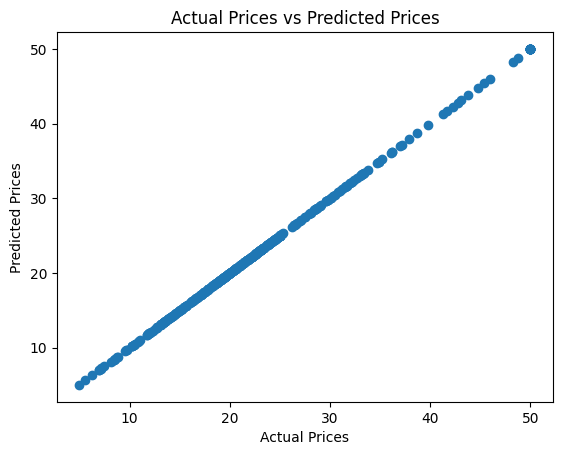

In [61]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [59]:
# Prediction on Test Data
testing_data_prediction = model.predict(X_test)

In [60]:
# R Squared Error
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
# Mean Absolute Error
mae_test = metrics.mean_absolute_error(Y_test, testing_data_prediction)
# Mean Squared Error
mse_test = metrics.mean_squared_error(Y_test, testing_data_prediction)

print(f"R Squared Error: {r2_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"Mean Squared Error: {mse_test}")

R Squared Error: 0.9051721149855378
Mean Absolute Error: 2.0748727686264927
Mean Squared Error: 7.9332706911154185


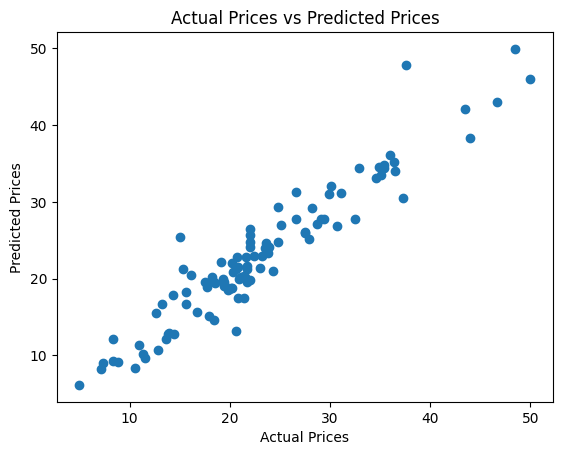

In [62]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()